In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
pokemon = pd.read_csv('pokemon.csv')

In [3]:
sorted_counts = pokemon.generation_id.value_counts()
sorted_counts

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

- matplotlib.pyplot.pie(x_data, labels, colors, startangle, counterclock, wedgeprops)

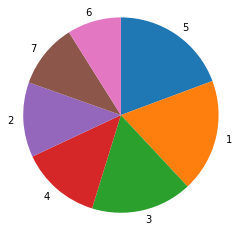

In [4]:
plt.pie(x = sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

The axis function call and 'square' argument makes it so that the scaling of the plot is equal on both the x- and y-axes. 

Without this call, the pie could end up looking oval-shaped, rather than a circle.

In [5]:
label = ['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6']

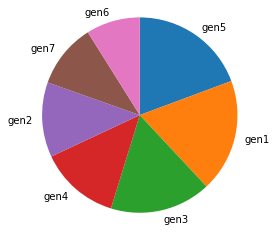

In [6]:
plt.pie(x = sorted_counts, labels = label, startangle = 90, counterclock = False);
plt.axis('square');

Labels are arranged in the decreasing order

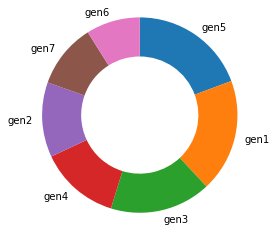

In [7]:
plt.pie(x = sorted_counts, labels = label, startangle = 90, counterclock = False, 
        wedgeprops = {'width' : 0.4});
plt.axis('square');

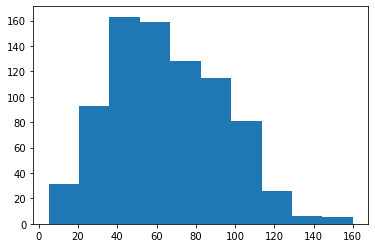

In [8]:
plt.hist(data = pokemon, x = "speed");

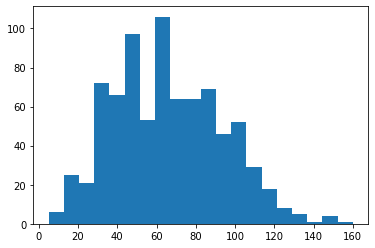

In [9]:
plt.hist(data = pokemon, x = "speed", bins = 20);

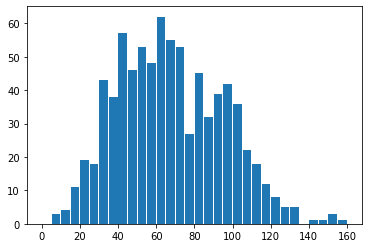

In [17]:
# bins 설정값은 실수이고, Value는 정수이므로 bins를 직접 설정해준다.
bins = np.arange(0, pokemon.speed.max()+5, 5)   # max(+5) : display the max value at the end to hold all values on the chart 

plt.hist(data = pokemon, x = "speed", bins = bins, rwidth = 0.9); # ridth 갈라짐

Adding in "+5" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

**For continuous numeric data, you should not make use of the "rwidth" parameter**

C:\Users\aicpa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


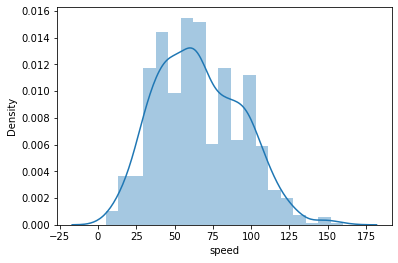

In [11]:
sb.distplot(pokemon['speed']); # y축은 density를 나타내는 것으로 총합 1에 맞게 설정됨.

C:\Users\aicpa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


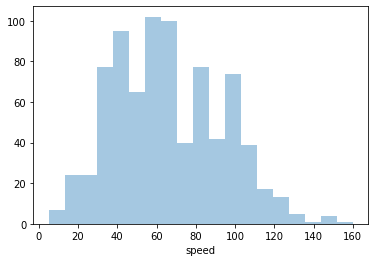

In [12]:
sb.distplot(pokemon['speed'], kde= False);   # 히스토그램 y축값으로 변경 kernel density estimate (KDE)

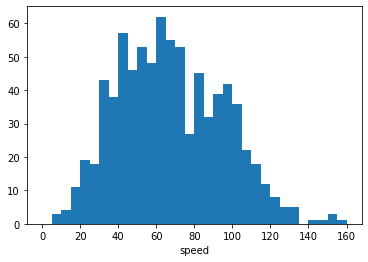

In [13]:
sb.distplot(pokemon['speed'], kde= False, bins = bins, hist_kws = {'alpha' : 1});   # kde= False 필히 삽입. KDE와 교차 방지

The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.

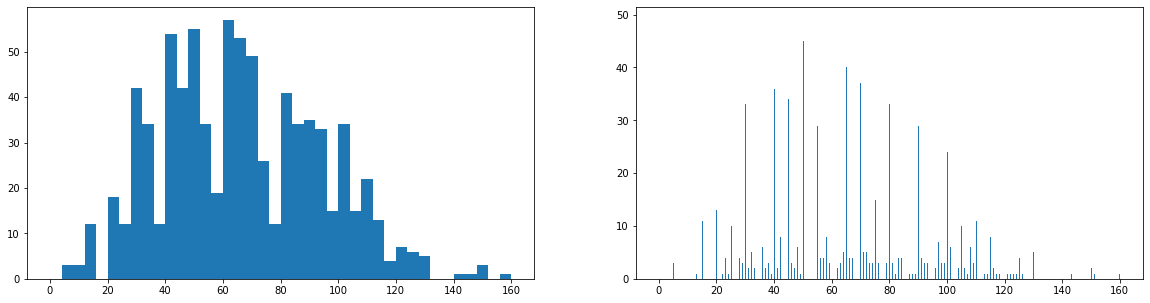

In [38]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);